In [12]:
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import time
from IPython.display import clear_output

## Red Neuronal (3 neuronas capa unica)

In [13]:
#Funcion de activacion 
fa = lambda x: 1/(1+np.e**(-x))

#inicializamos pesos y bias
w0,w1,w2 = 0.25, 0.98, 1.20
b0,b1,b2 = 1, 1, 1

In [14]:
#Se construyen los parametros de entrada y de salida 
#Generacion de los datos
X =np.array(np.linspace(-4, 4, 20))
X = X[:,np.newaxis]
#Pendiente (m), Corte en Y(b), Valores de Y sin ruido(_Y)
m , b = 0.5, 1
_Y = np.sin(b +m*X)
#Genera el ruido en los valores de _Y
Y=[]
for i in range(len(X)):
   a = _Y[i] + ( (-1)**( (i%2)+2) )   *0.1*random.random()
   Y.append(a)

Y=np.array(Y)

Valor Inicial del Error Cuadratico:  54.87200084590793
Valor Intermedio del Error Cuadratico:  54.457067098357705
Valor Intermedio del Error Cuadratico:  3.244891064586789
Valor Intermedio del Error Cuadratico:  3.2166952704119427
Valor Final del Error Cuadratico:  3.207982825363642 

Valores Finales de Pesos y Sesgos para la red neuronal
W0= 0.0008956286827431251 W1= 0.0008956143520730046 W2= 2.588442294427817     B0= -7.126462406022502 B1= -7.117892898711324 B2= 2.331041156564513 



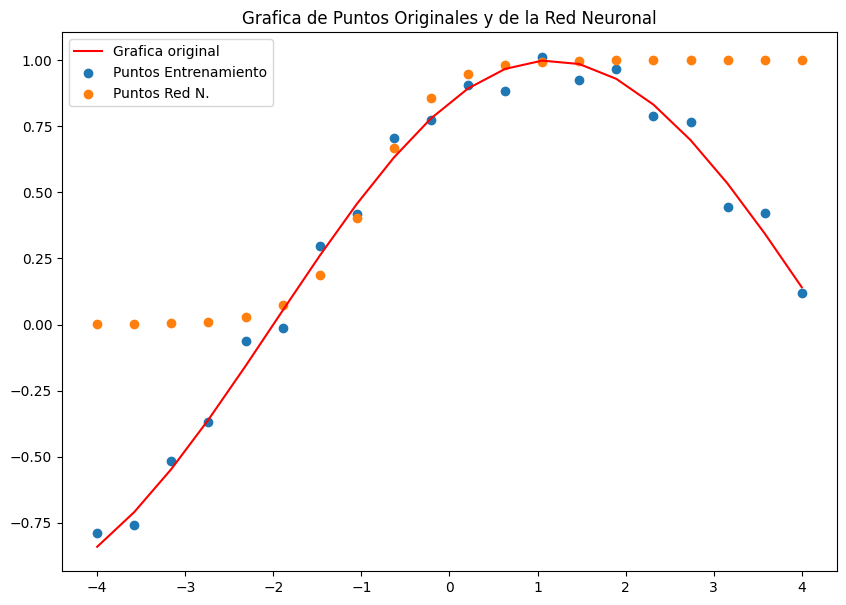

In [15]:
#Forward pass
Yred = fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2)

print("Valor Inicial del Error Cuadratico: ", np.sum((Y - Yred)**2))

#Funcion de error cuadratico de la red junto con el Forward pass
def Error(w0,w1,w2,b0,b1,b2):
  return np.sum( (Y - (fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2)) ) **2 )

#Descenso del gradiente aplicado a la salida de la red
lr = 0.1
h = 0.01

#COMETARIO: con 1 millon de iteraciones el error fue de 3.19
for i in range(60000):
  w0 = w0 - lr* (Error(w0+h,w1,w2,b0,b1,b2) - Error(w0-h,w1,w2,b0,b1,b2))
  w1 = w1 - lr* (Error(w0,w1+h,w2,b0,b1,b2) - Error(w0,w1-h,w2,b0,b1,b2))
  w2 = w2 - lr* (Error(w0,w1,w2+h,b0,b1,b2) - Error(w0,w1,w2-h,b0,b1,b2))

  b0 = b0 - lr* (Error(w0,w1,w2,b0+h,b1,b2) - Error(w0,w1,w2,b0-h,b1,b2))
  b1 = b1 - lr* (Error(w0,w1,w2,b0,b1+h,b2) - Error(w0,w1,w2,b0,b1-h,b2))
  b2 = b2 - lr* (Error(w0,w1,w2,b0,b1,b2+h) - Error(w0,w1,w2,b0,b1,b2-h)) 

  if (i % 20000 == 0):
     print("Valor Intermedio del Error Cuadratico: ", np.sum( (Y - (fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2)) ) **2 )) 

print("Valor Final del Error Cuadratico: ", np.sum( (Y - (fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2)) ) **2 ), "\n")

print("Valores Finales de Pesos y Sesgos para la red neuronal")
print("W0=", w0, "W1=", w1, "W2=", w2, "   ", "B0=", b0,"B1=", b1, "B2=", b2, "\n")

#Graficas de los puntos originales y los de la red neuronal
fig = plt.figure(figsize=(10,7))
plt.title("Grafica de Puntos Originales y de la Red Neuronal") 
plt.plot(X,_Y, color='red')
plt.scatter(X,Y)
plt.scatter(X,fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2))
plt.legend(["Grafica original","Puntos Entrenamiento","Puntos Red N."])
plt.show()